In [1]:
# data => Social_Network_Ads.csv
# location => https://mitu.co.in/dataset

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [103]:
df.shape

(400, 5)

In [105]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [107]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [109]:
# separate input and output data

In [111]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [113]:
x;

In [115]:
# check for linearity

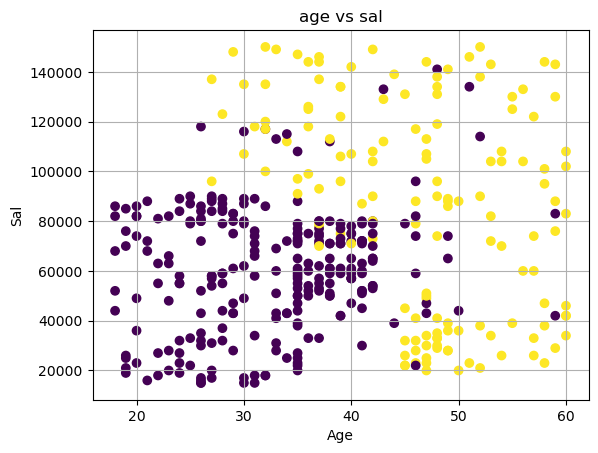

In [117]:
plt.title("age vs sal")
plt.xlabel('Age')
plt.ylabel('Sal')
plt.scatter(x['Age'], x['EstimatedSalary'], c = df['Purchased'])
plt.grid();

In [118]:
# cross validation

In [121]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.25)

In [123]:
x_train.shape, y_train.shape

((300, 2), (300,))

In [125]:
x_test.shape, y_test.shape

((100, 2), (100,))

In [127]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [129]:
# feature scaling -> normalization

In [131]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()

In [137]:
x_train_scaled = sca.fit_transform(x_train)
x_test_scaled = sca.transform(x_test)

In [139]:
# build the model

In [141]:
from sklearn.linear_model import LogisticRegression

In [143]:
log = LogisticRegression()

In [145]:
log.fit(x_train_scaled, y_train)

LogisticRegression()

In [147]:
# evaluate

In [149]:
y_pred = log.predict(x_test_scaled)

In [151]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [153]:
# create a dataframe for actual and predicted

In [155]:
result = pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred
})
result

,actual,predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [157]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

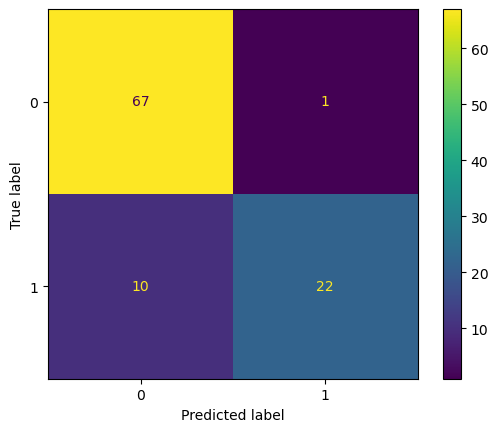

In [159]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [161]:
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [173]:
recall = 67 / 68 # recall
# out of total 0 in the data how many model predicted
recall

0.9852941176470589

In [175]:
precision = 67 / 77  # precision
# out of 0 predicted by model how many are correct
precision

0.8701298701298701

In [179]:
(2 * recall * precision)/ (recall + precision)
# harmonic mean of precision and recall

0.9241379310344828

In [181]:
# actual accuracy
accuracy_score(y_test, y_pred)

0.89

In [183]:
# roc_auc

In [185]:
from sklearn.metrics import roc_auc_score, roc_curve

In [209]:
y_pred_prob = log.predict_proba(x_test_scaled)[:,1]

In [217]:
y_pred_prob;

In [221]:
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.9545036764705882

In [215]:
roc_curve(y_test, y_pred_prob)

(array([0.        , 0.        , 0.        , 0.01470588, 0.01470588,
        0.04411765, 0.04411765, 0.05882353, 0.05882353, 0.10294118,
        0.10294118, 0.14705882, 0.14705882, 0.16176471, 0.16176471,
        0.22058824, 0.22058824, 0.41176471, 0.41176471, 0.64705882,
        0.67647059, 1.        ]),
 array([0.     , 0.03125, 0.1875 , 0.1875 , 0.75   , 0.75   , 0.8125 ,
        0.8125 , 0.84375, 0.84375, 0.875  , 0.875  , 0.90625, 0.90625,
        0.9375 , 0.9375 , 0.96875, 0.96875, 1.     , 1.     , 1.     ,
        1.     ]),
 array([       inf, 0.95237859, 0.88667807, 0.87686454, 0.47843811,
        0.45332175, 0.43555642, 0.43519022, 0.41548475, 0.40147195,
        0.39822022, 0.36228151, 0.34812977, 0.34200509, 0.3377789 ,
        0.32409787, 0.30669124, 0.18111912, 0.17989653, 0.09803244,
        0.09684077, 0.0226023 ]))

In [219]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

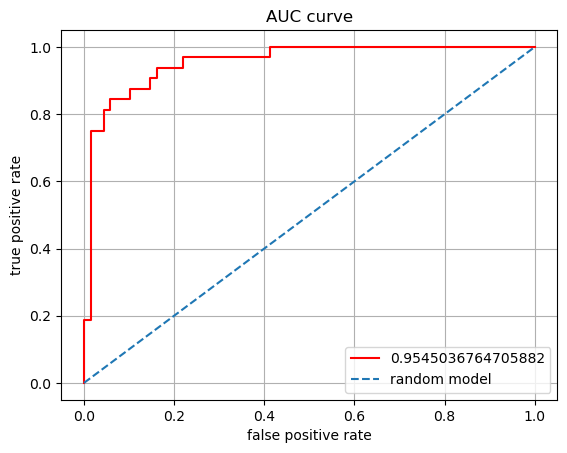

In [233]:
plt.title("AUC curve")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr, color = 'red', label = auc)
plt.plot([0,1], [0,1], label = 'random model', ls = '--')
plt.grid();
plt.legend();

In [235]:
# threshold tuning

In [241]:
log.predict_proba(x_test_scaled);

In [243]:
y_pred_prob;

In [245]:
threshold = 0.7
y_pred_new = (y_pred_prob > threshold).astype(int)

In [247]:
y_pred_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])